In [2]:
import pandas as pd
import os

common_results =pd.read_csv('./Our_results/common_results.csv').drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
gap_results =pd.read_csv('./Our_results/gap_results.csv').drop(['Unnamed: 0'], axis=1)
additional_results =pd.read_csv('./Our_results/additional_results.csv').drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

manual_labeling =pd.read_csv('./Manual_labeling/Manual_labeling.csv')

manual_labeling.columns = ['repo_name','sha','file','refactoring_type']

category = []

for sha in manual_labeling.sha :
    if sha in common_results.sha.tolist():
        category.append('common')
    if sha in gap_results.sha.tolist():
        category.append('gap')
    if sha in additional_results.sha.tolist():
        category.append('additional')

manual_labeling['category'] = category
manual_labeling

,repo_name,sha,file,refactoring_type,category
0,amazeeio/lagoon,fd6b0db52f09dc5a67231c579f745b8df2eb716a,local-dev/hiera-watcher-pusher/Dockerfile,Rename image,gap
1,amazeeio/lagoon,fd6b0db52f09dc5a67231c579f745b8df2eb716a,services/api/Dockerfile,Rename image,gap
2,amazeeio/lagoon,fd6b0db52f09dc5a67231c579f745b8df2eb716a,services/auth-server/Dockerfile,Rename image,gap
3,amazeeio/lagoon,fd6b0db52f09dc5a67231c579f745b8df2eb716a,services/auth-ssh/Dockerfile,Rename image,gap
4,amazeeio/lagoon,fd6b0db52f09dc5a67231c579f745b8df2eb716a,services/hacky-rest2tasks-ui/Dockerfile,Rename image,gap
...,...,...,...,...,...
227,aspuru-guzik-group/mission_control,a98cbfb31814009b5270390f5c63a82db3b70e50,NaN,add ENV attribute,common
228,cyber-dojo/storer,6eada435f08fa28b1f7adc1baa60ced2f52fb854,NaN,use array notation,common
229,cyber-dojo/storer,77dcfd36e865e35fd4d1327deda13f9aefdfaf78,NaN,add tmpfs attribute,common
230,cyber-dojo/storer,77dcfd36e865e35fd4d1327deda13f9aefdfaf78,NaN,add read only attribute,common


In [20]:
data = manual_labeling.groupby(['refactoring_type'])['refactoring_type'].count()
print(data)

refactoring_type
Access volume                               1
Add ENV variables                          14
Extract Run Instruction                    71
Inline instructions                         2
Modify labels                               1
Remove instruction                          1
Rename ARG variables                        5
Rename container                            3
Rename image                               12
Rename service                              9
Rename volume                               1
Reorder Instructions                       12
Update Base Image                          76
Update Run Instruction                     18
add ARG attribute                           1
add ENV attribute                           1
add read only attribute                     1
add tmpfs attribute                         1
remove service from depends on attibute     1
use array notation                          1
Name: refactoring_type, dtype: int64


20 20


Text(0, 0.5, 'Occurences')

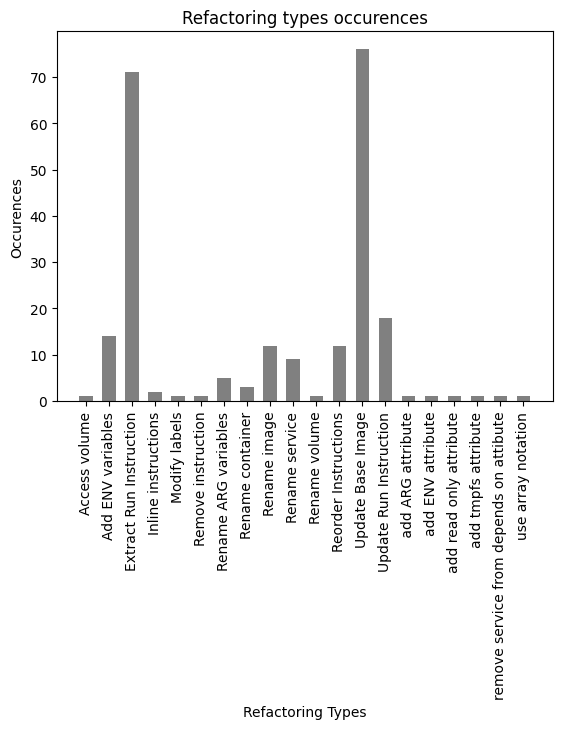

In [29]:
from matplotlib import pyplot 

pyplot.bar(range(len(data)), data.to_list(), width = 0.6, color = 'gray')

refactoring_types = ['Access volume','Add ENV variables','Extract Run Instruction','Inline instructions' ,'Modify labels','Remove instruction' ,'Rename ARG variables' ,'Rename container','Rename image','Rename service','Rename volume','Reorder Instructions','Update Base Image','Update Run Instruction',' add ARG attribute' ,'add ENV attribute','add read only attribute','add tmpfs attribute','remove service from depends on attibute','use array notation']

print(len(data),len(refactoring_types))
pyplot.xticks(range(len(data)), refactoring_types ,
rotation = 90)
pyplot.title('Refactoring types occurences')
pyplot.xlabel('Refactoring Types')
pyplot.ylabel('Occurences')



In [6]:
len(manual_labeling['sha'].unique())

39